<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/anova_tukey_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos

Nesta seção, apresentamos exemplos de aplicação do teste ANOVA. Nesses exemplos, considere $\alpha=0.05$.

## Exemplo 1

Neste exemplo, vamos usar o conjunto de dados [PlantGrowth](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html). A situação-problema que vamos considerar é descrita abaixo.

> Durante o cultivo de uma certa uma plantação, dois tratamentos foram aplicados. Deseja-se investigar a efetividade desses tratamentos no peso médio final dos frutos obtidos na colheita. Além disso, algumas plantas foram selecionadas (também de forma aleatória) para não receber tratamento algum, como forma de controle. Após a colheita, o peso médio do frutos foi calculado. A pergunta de pesquisa é a seguinte: há diferença significativa do ponto de vista estatístico entre os pesos médios da colheita em cada um dos três grupos (primeiro tratamento, segundo tratamento, grupo de controle)?

**Solução**

Vamos resolver essa situação-problema com base nos princípios do teste ANOVA de uma via, já que queremos comparar as médias de três grupos independentes:
- Tratamento 1
- Tratamento 2
- Controle (sem tratamento)

Repare que na situação-problema acima, a variável independente é o tipo de tratamento, com valores trt1, trt2 e ctrl. Há também a variável dependente, peso dos frutos.

A célula de código abaixo faz a carga das observações realizadas. As colunas `group` e `weight` correspondem às variáveis independente e dependente, respectivamente.

In [ ]:
import pandas as pd
import numpy as np

frutos_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv')
print(frutos_df.shape)
frutos_df.head(30)

(30, 3)


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [ ]:
frutos_df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [ ]:
frutos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes



Antes da aplicação do ANOVA, devemos verificar se as condições de aplicabilidade se verificam.

A primeira condição de aplicabilidade que vamos verificar diz respeito a igualdade das variâncias das amostras. Há vários teste que podem ser aplicados para realizar essa verificação. Um deles é denominado [teste de Levene](https://en.wikipedia.org/wiki/Levene%27s_test). Esse teste serve para verificar a hipótese nula de que as variâncias de duas ou mais populações são iguais (essa propriedade é conhecida como *homocedasticidade*). Se o valor $p$ resultante do teste de Levene for menor do que algum nível de significância (normalmente 0,05), é improvável que as diferenças obtidas nas variâncias das amostras tenham ocorrido com base na amostragem aleatória de uma população com variâncias iguais. Se esse for o caso, a hipótese nula (que alega que as variâncias são iguais) é rejeitada e conclui-se que existe uma diferença entre as variâncias na população.

A célula de código a seguir aplica o [teste de Levene](https://en.wikipedia.org/wiki/Levene%27s_test) para verificar se cada uma das três amostras é aproximadamente normalmente distribuída.

In [ ]:
import numpy as np
from scipy.stats import levene

trt1 = frutos_df['weight'][frutos_df.group == 'trt1']
trt2 = frutos_df['weight'][frutos_df.group == 'trt2']
ctrl = frutos_df['weight'][frutos_df.group == 'ctrl']

# Levene's test for homogeneity of variance
stat, p = levene(trt1, trt2, ctrl, center = 'mean')
print('Levene’s test statistic = %.3f, p-value = %.3f' % (stat, p))

Levene’s test statistic = 1.237, p-value = 0.306


Pelo valor obtido para $p$ (aproximadamente $0.30$), podemos concluir, no nível de significância de 5% que devemos aceitar a hipótese nula: não há diferença significativa entre as variâncias das três populações.

De fato, as variâncias das amostras, apresentadas a seguir, estão na mesma ordem de grandeza.

In [ ]:
[np.var(x, ddof=1) for x in [trt1, trt2, ctrl]]

[0.6299211111111114, 0.19587111111111105, 0.3399955555555556]

Outra condição de aplicabilidade a ser verificada diz respeito à **normalidade**. Mais especificamente, devemos verificar se as amostras usadas são provenientes de populações aproximadamente normais. Para isso, aplicamos a função [scipy.stats.normtest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). Veja a célula de código abaixo.

In [ ]:
from scipy import stats

np.random.seed(28041990)

def apply_normaltest(x):
  k2, p = stats.normaltest(x)
  alpha = .05
  print("p = {:g}".format(p))

  if p < alpha:  # H_0: x é proveniente de uma distribuição normal
    print("A hipótese nula pode ser rejeitada")
  else:
    print("A hipótese nula pode NÃO ser rejeitada")

[apply_normaltest(x) for x in [trt1, trt2, ctrl]]

p = 0.616393
A hipótese nula pode NÃO ser rejeitada
p = 0.602548
A hipótese nula pode NÃO ser rejeitada
p = 0.88981
A hipótese nula pode NÃO ser rejeitada


/home/ebezerra/anaconda3/envs/gcc1625/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


[None, None, None]

Considerando no nível de significância $\alpha=0.05$, os três valores obtidos para $p$ (todos maiores do que $\alpha$) nos levam a concluir que a hipótese nula não pode ser rejeitada, i.e., há evidências para concluir que as amostras são provenientes de distribuições aproximadamente normais.

Após a verificação das condições de aplicabilidade (normalidade das amostras e igualdade da variâncias), podemos finalmente aplicar o ANOVA. Para isso, vamos usar a função [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). Essa função encapsula parte do procedimento de aplicação do ANOVA. Para invocar essa função, basta passar cada grupo (amostra) como um array numpy. Essa função retorna o valor da estatística $F$ e o valor de $p$ correspondente.

In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(trt1, trt2, ctrl)

print("Resultado da ANOVA:")
print(f"F = {f_stat:.4f}")
print(f"valor-p = {p_value:.4f}")

Resultado da ANOVA:
F = 4.8461
valor-p = 0.0159


O valor obtido para $p$ (aproximadamente $0.016$) nos leva a concluir que, no nível de significância de 5%, podemos rejeitar a hipótese nula (que alega que as médias dos três tratamentos são iguais). Portanto, há evidência estatística de que pelo menos um grupo apresenta peso médio diferente.

---

## Exemplo 2

Durante um experimento para estudar o comportamento de formigas, pesquisadores preparam sanduíches com diferentes tipos de recheio: Ham & Pickles, Peanut Butter e Vegemite. O número de formigas atraídas por cada sanduíche é registrado. A pergunta de pesquisa é:

> O tipo de recheio influencia significativamente o número médio de formigas atraídas?

**Solução**



In [ ]:
import pandas as pd
import numpy as np

# Read data source
df_sandwichAnts = pd.read_csv('../data/SandwichAnts.csv')
df_sandwichAnts.head()

,rownames,Trial,Bread,Filling,Butter,Ants
0,1,1,WholeWheat,HamPickles,no,34
1,2,2,MultiGrain,PeanutButter,yes,47
2,3,3,Rye,HamPickles,yes,67
3,4,4,MultiGrain,HamPickles,yes,63
4,5,5,WholeWheat,HamPickles,no,65


In [ ]:
# Calculate mean and standard deviation for each sandwich filling
means = df_sandwichAnts.groupby('Filling')['Ants'].mean()
std_devs = df_sandwichAnts.groupby('Filling')['Ants'].std()

print("Mean number of ants for each sandwich filling:")
print(means)

print("\nStandard deviation of ants for each sandwich filling:")
print(std_devs)

Mean number of ants for each sandwich filling:
Filling
HamPickles      55.500
PeanutButter    40.375
Vegemite        34.625
Name: Ants, dtype: float64

Standard deviation of ants for each sandwich filling:
Filling
HamPickles      12.055428
PeanutButter    14.183911
Vegemite        11.158704
Name: Ants, dtype: float64


In [ ]:
df_HamPickles = df_sandwichAnts['Ants'][df_sandwichAnts.Filling == 'HamPickles']
df_PeanutButter = df_sandwichAnts['Ants'][df_sandwichAnts.Filling == 'PeanutButter']
df_Vegemite = df_sandwichAnts['Ants'][df_sandwichAnts.Filling == 'Vegemite']

print(f'Sample sizes (HamPickles/PeanutButter/Vegemite): {df_HamPickles.shape[0]}, {df_PeanutButter.shape[0]}, {df_Vegemite.shape[0]}')

Sample sizes (HamPickles/PeanutButter/Vegemite): 16, 16, 16


In [ ]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(df_HamPickles, df_PeanutButter, df_Vegemite)
print(f"F = {f_stat:.4f}")
print(f"valor-p = {p_value:.4f}")

F = 11.8479
valor-p = 0.0001


Foi aplicado um teste ANOVA de uma via comparando os grupos definidos por `Filling`. O resultado foi:

- Estatística F = 11.85
- Valor-p = 0.00007

Como o valor-p é muito menor que 0.05, rejeitamos a hipótese nula:
> Há evidência estatística de que o tipo de recheio influencia o número médio de formigas.
___

## Exemplo 3

Neste exemplo, vamos aplicar o teste de Tukey sobre o problema relativo ao dataset SandwichAnts.

In [ ]:
# pip install statsmodels

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Teste de Tukey
tukey = pairwise_tukeyhsd(endog=df_sandwichAnts["Ants"], groups=df_sandwichAnts["Filling"], alpha=0.05)

dataframe=pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

print("Resumo do Teste de Tukey:")
dataframe.head()

Resumo do Teste de Tukey:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,HamPickles,PeanutButter,-15.125,0.0038,-25.862,-4.388,True
1,HamPickles,Vegemite,-20.875,0.0001,-31.612,-10.138,True
2,PeanutButter,Vegemite,-5.750,0.4037,-16.487,4.987,False


Com base na variável **Filling** (recheio do sanduíche) e o número de **formigas atraídas**, temos:

| Grupo 1      | Grupo 2      | Diferença de médias | Valor-p ajustado | IC Inferior | IC Superior | Diferença significativa? |
| ------------ | ------------ | ------------------- | ---------------- | ----------- | ----------- | ------------------------ |
| HamPickles   | PeanutButter | -15.125             | 0.0038           | -25.862     | -4.388      | ✅ Sim                    |
| HamPickles   | Vegemite     | -20.875             | 0.0001           | -31.612     | -10.138     | ✅ Sim                    |
| PeanutButter | Vegemite     | -5.750              | 0.4037           | -16.487     | 4.987       | ❌ Não                    |

**Conclusão**:

* **Sanduíches com *Ham & Pickles*** atraíram significativamente **mais formigas** do que os com *Peanut Butter* e *Vegemite*.
* A diferença entre *Peanut Butter* e *Vegemite* **não é estatisticamente significativa**.

Isso sugere que o tipo de recheio afeta o número de formigas, especialmente quando *Ham & Pickles* está envolvido.

Vamos criar um gráfico para ilustrar o resultado do teste de Tukey. Nesse gráfico, a **linha vertical zero** representa o ponto de **"diferença de médias igual a zero"**, isto é:

$$
\bar{x}_i - \bar{x}_j = 0
$$

Essa linha é o **referencial neutro**: se o **intervalo de confiança da diferença de médias** entre dois grupos **inclui o zero**, isso significa que **não podemos afirmar que a diferença entre os grupos é estatisticamente significativa** — o zero está dentro do intervalo de plausibilidade.

**Interpretar**:

* Se a **barra horizontal (intervalo de confiança)** **cruza a linha vertical zero**, então **não há diferença significativa**.
* Se a **barra está totalmente à esquerda ou à direita** da linha zero (sem tocá-la), então há **diferença significativa** entre os grupos.

No gráfico fornecido:

* A linha vertical que passa por zero é desenhada como referência — ela **não é uma linha de dados**, mas um **marcador visual** para saber se um intervalo de confiança inclui ou não o valor nulo (diferença zero).
* Ela está localizada no centro do eixo horizontal, geralmente não rotulada explicitamente como "0", mas é ali que você deve procurar se os **ICs das comparações cruzam ou não zero**.

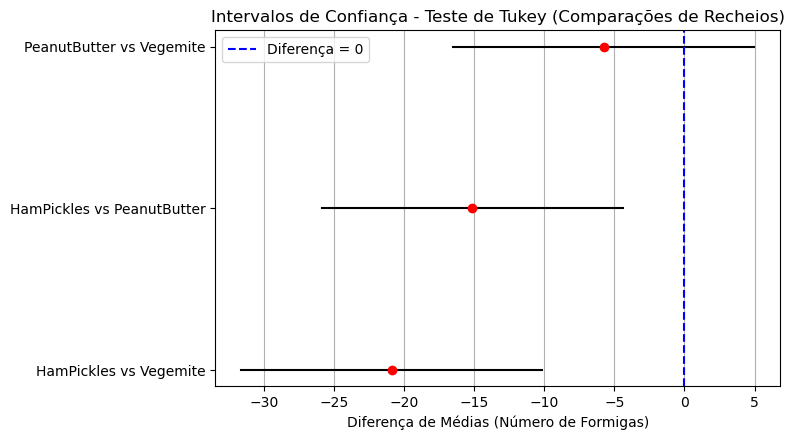

In [ ]:
from matplotlib import pyplot as plt

# Cria um gráfico customizado com destaque na linha zero e intervalos de confiança

# Extrair dados do objeto tukey
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Definir posição no eixo y para cada comparação
tukey_df["comparison"] = tukey_df["group1"] + " vs " + tukey_df["group2"]
tukey_df = tukey_df.sort_values("meandiff", ascending=True).reset_index(drop=True)
tukey_df["ypos"] = range(len(tukey_df))

# Criar o gráfico
plt.figure(figsize=(8, 4.5))
for i, row in tukey_df.iterrows():
    plt.plot([row["lower"], row["upper"]], [row["ypos"]]*2, color="black")
    plt.plot(row["meandiff"], row["ypos"], "o", color="red")

# Linha vertical no zero
plt.axvline(x=0, color="blue", linestyle="--", label="Diferença = 0")

# Customizações
plt.yticks(tukey_df["ypos"], tukey_df["comparison"])
plt.xlabel("Diferença de Médias (Número de Formigas)")
plt.title("Intervalos de Confiança - Teste de Tukey (Comparações de Recheios)")
plt.legend()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


# Exercícios Propostos

A seguir estão três exercícios propostos. Cada uma envolve **comparação de médias entre três ou mais grupos**. Resolva esses exercícios usando os dados fornecidos nos arquivos `anova/MetodoEstudo.csv`, `anova/Fertilizante.csv` e `SatisfacaoCelular.csv`.

###  Exercício 1 – Efeitos de Diferentes Métodos de Estudo

**Contexto:**
Uma professora quer investigar se diferentes métodos de estudo afetam o desempenho dos alunos em uma prova final. Ela divide os alunos aleatoriamente em três grupos:

* **Grupo 1:** Estudo individual em casa
* **Grupo 2:** Estudo em grupo na biblioteca
* **Grupo 3:** Aulas de revisão com o professor

Após a prova, ela coleta as notas dos alunos de cada grupo.

**Pergunta de pesquisa:**

> Existe diferença estatisticamente significativa entre as **médias das notas** dos alunos que utilizaram os diferentes métodos de estudo?

Aplique ANOVA de uma via e, se necessário, o teste de Tukey para identificar **quais métodos diferem entre si**.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/anova/MetodoEstudo.csv")
df["Metodo"].unique()
df

,Metodo,Nota
0,Individual,5.414369
1,Individual,7.497345
2,Individual,6.782978
3,Individual,4.993705
4,Individual,5.921400
...,...,...
85,Revisao,7.131278
86,Revisao,7.414030
87,Revisao,7.029981
88,Revisao,9.669691


In [ ]:
individual = df[df["Metodo"]=="Individual"]["Nota"]
revisao = df[df["Metodo"]=="Revisao"]["Nota"]
grupo = df[df["Metodo"]=="Grupo"]["Nota"]

print(individual.mean(), revisao.mean(), grupo.mean())
print(individual.std(), revisao.std(), grupo.std())

6.54471397096187 7.9369304474340785 7.327336723847698
1.1872005911396053 0.8499438326003719 1.1093870996669042


In [ ]:
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

f, p = scipy.stats.f_oneway(individual, revisao, grupo)
f, p

(np.float64(13.03624602107877), np.float64(1.1170164324897913e-05))

In [ ]:
result = pairwise_tukeyhsd(endog=df["Nota"], groups=df["Metodo"])

print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
     Grupo Individual  -0.7826 0.0144 -1.4344 -0.1308   True
     Grupo    Revisao   0.6096 0.0718 -0.0422  1.2614  False
Individual    Revisao   1.3922    0.0  0.7404   2.044   True
------------------------------------------------------------


estudar idnvidual ~e ruim!

###  Exercício 2 – Crescimento de Plantas com Diferentes Fertilizantes

**Contexto:**
Um agrônomo testa três tipos de fertilizantes (A, B e C) no cultivo de alface. Cada tipo é aplicado em uma amostra diferente de plantas, e o crescimento (em centímetros) é medido após 30 dias.

**Pergunta de pesquisa:**

> O tipo de fertilizante influencia significativamente a **altura média das plantas**?

Use o teste ANOVA para comparar as médias das alturas. Caso haja diferença significativa, aplique o teste de Tukey para indicar **quais fertilizantes** proporcionaram maior crescimento.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/anova/Fertilizante.csv")
df

,Metodo,Nota
0,A,13.725308
1,A,10.098972
2,A,12.271553
3,A,13.766793
4,A,11.497484
...,...,...
70,C,15.526411
71,C,15.247847
72,C,15.674235
73,C,16.415816


In [ ]:
A = df[df["Metodo"]=="A"]["Nota"]
B = df[df["Metodo"]=="B"]["Nota"]
C = df[df["Metodo"]=="C"]["Nota"]
print(A.mean(), B.mean(), C.mean())
print(A.std(), B.std(), C.std())

12.012393729372384 14.100123130536558 15.611311778386344
1.6835738900164987 1.211492555366512 1.0442219901415601


In [ ]:
f, p = f_oneway(A,B,C)
f, p

(np.float64(45.42046774171955), np.float64(1.7397253055618299e-13))

p < 0.5, existe diferenca estiatisca significiadtiva

In [ ]:
result = pairwise_tukeyhsd(df["Nota"], df["Metodo"])
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     A      B   2.0877    0.0 1.1802 2.9952   True
     A      C   3.5989    0.0 2.6914 4.5064   True
     B      C   1.5112 0.0005 0.6037 2.4187   True
--------------------------------------------------


### Exercício 3 – Satisfação com Modelos de Celular

**Contexto:**
Uma empresa realiza uma pesquisa de satisfação com usuários de três modelos diferentes de smartphones: **Modelo X**, **Modelo Y** e **Modelo Z**. Os usuários avaliam seu grau de satisfação numa escala de 0 a 10.

**Pergunta de pesquisa:**

> Há diferença significativa entre as **médias de satisfação** dos usuários dos três modelos?

Aplique ANOVA e discuta se existe **um modelo claramente melhor** em termos de percepção do consumidor. Se necessário, aplique teste post-hoc.

---